# Predictive Modelling

*Build a predictive model which forecasts the AverageTemperature of the 4 cities
from the previous task until and including 2013-12-01. Additionally focus on the
following questions:*

**Note**: This question was a bit confusing for me and I am not shure whether I got it correct:
- in my opinion, it makes little sense to use one model for four different citites, which have differnet temperature scales, progressions, geographic properties etc. 
- Therefore I trained four dedicated models, one for each city
- The models can be addessed via the wrapper class `CityWeatherForecastingModel` in the file `predictive_model.py`
- All models as well as train and test data are contained in this class
- I chose Holt-Winters as a predictive model (which is quite simple of course)

In the following I will demonstrate the Usage of the class

In [14]:
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
# read data
df_city_temps = pd.read_csv("data/archive/GlobalLandTemperaturesByCity.csv",
                            index_col="dt",
                            parse_dates=True)

In [15]:
from predictive_model import CityWeatherForecastingModel

In [16]:
# Create an Instance of CityWeatherForecastingModel, based on the City data and the top four cities from Task 1.2
forecasting_model = CityWeatherForecastingModel(
    data_df=df_city_temps,
    city_list=["Hailar", "Heihe", "Nehe", "Ust Ilimsk"])

Second, fit the model to all four cities. By default, training data from 1960-01-01 until 1999-12-01 is used. Train data (prediction period): 2000-01-01 until 2013-12-01.

In [17]:
forecasting_model.fit()

now all models have been fitted. In the following, it is possible to make predictions with the model for the corresponding city. By default, the prediction period is until 2013-12-01. Ths can be changed by passing the parameter `target_date`

In [11]:
forecasting_model.predict(city="Hailar", target_date="2013-12-01")

2000-01-01   -24.786640
2000-02-01   -20.911128
2000-03-01   -10.856349
2000-04-01     1.782702
2000-05-01    10.922637
                ...    
2013-07-01    20.184991
2013-08-01    17.842247
2013-09-01    10.614197
2013-10-01     1.023325
2013-11-01   -11.445039
Freq: MS, Length: 167, dtype: float64

To get a bit of a feeling for the model, a visual interpretation is given by the method `plot_predictions` which takes the same arguments as `predict`:

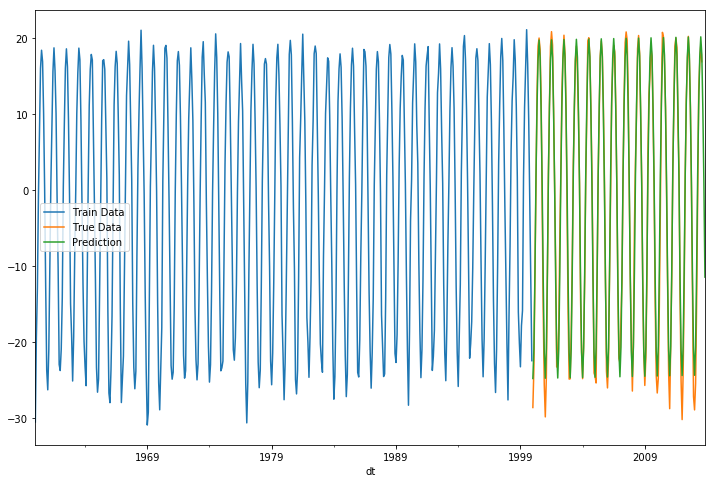

In [12]:
forecasting_model.plot_predictions(city="Hailar", target_date="2013-12-01")

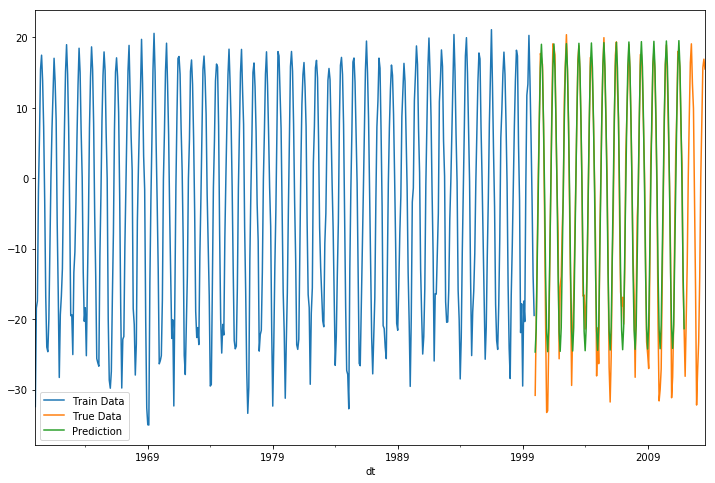

In [20]:
forecasting_model.plot_predictions(city="Ust Ilimsk", target_date="2012-01-01")

As can be seen, the model does not perfect predictions but is able to capture the general seasonal structure quite well.

This is of course possible for the other cities as well.

### Statement on the questions asked:

*Q1: Which preprocessing did you perform and why?:* 
- Besides removing missing values, no further preprocessing was necessary.

Q2: *Are there any variables or additional data sources you could use?:* 
- Especially meteorological variables (such as air humidity, pressure, wind, rainfall) would have been helpful in forecasting the average temperature. However, as the data is available on a monthly basis, it is naturally subject to variation.
- Additionaly, variables which have a long-term influence on the weather (e.g. as the concentration of atmospheric gases) would have been very interesting.
Forecasting solely on the weather timeseries itself cannot explain the variations since 1990s.

*Q3: Which methods/tools would you look into if given more time?*: 
- As continuation of a simple model: Double (Trend) Exp. Smoothing
- More complex models: Neural networks (LSTM). But only if more variables are available.

*Q4: Any results you came across worth mentioning/interpreting?*:
- As expected, the model is able to roughly explain the seasonality, but not the overall changes
- All deviations from the "average season" cannot be explained by the model. Because further exogeneous variables are missing, these effects canont be explained by the model

*Q5: How satisfied and confident are you with the resulting model?*
- The model is able to capute the general seasonal structure and can therefore serve as a rough indicator
- Howver, as the model was trained on 1960-2000s data, it has not captured the recent changes in average temperature (As was shown in the EDA task). Therefore, the model will not be able to predict the overall increasing temperatures
- W.r.t. model performance, it works as one would expect it of such a simple model (generally captures structure but of course able to explain precise deviations)